# Mátrixok és vektorok (Matrices and vectors)

A következőkben a legfontosabb, tudományos számításokra használt könyvtárakat tekintjük át.

* numpy
* matplotlib
* pandas


Elsőként a Numpy-al foglakozunk, ami a legalapvetőbb lineáris algebrai könyvtár. Ezek a könyvtárak a hatékonyság miatt elsősorban C/C ++, esetleg Cython-ban implementált függvényekre támaszkodnak, vagyis itt valójában C-szerűen tárolt vektorokról lesz szó, amelyeken lényegében C++ függvények hívódnak meg, mindezt elrejtve a felhasználó elől, Python függvényhívások mögé.

A numpy nem része a Python standard library-nek, azaz installálni kell. Ha Anaconda csomagkezelőnk van, akkor a numpy már valószínűleg telepítve van, egyébként pedig a Python saját `pip` csomagkezelőjével lehet telepíteni, a 

```
pip install numpy
```
paranccsal. Megadott verziószámú csomagot is lehet telepíteni, ha szükséges.

```
pip install numpy==1.23.2
```

In [1]:
# A numpy importálására az alábbi konvenciót szokás használni.

import numpy as np

A Numpy alapvető adatszerkezete az `ndarray`, ami egy $N$-dimenziós, azonos típusú elemeket tartalmazó, fix méretű tömb.

Típus alatt itt elsősorban a C-ből ismert numerikus típusokat értjük, noha lehetséges sztringeket is ilyen tömbbe tenni. Egy Python lista Python objektumokat tartalmaz, amelyek össze-vissza lehetnek a memóriában, ezzel szemben egy C-tömb (kihasználva, hogy minden elemének ugyanaz a típusa) a memóriának egy összefüggő területét foglalja el.

```
np.float_, np.float32, np.float64, ...
np.int_, np.int32, np.int64, ...
np.bool_
```

Itt a hatékonyság kedvéért le kell mondanunk a tetszőleges hosszúságú Python egészekről.

### Egydimenziós tömbök konstruálása

In [2]:
# Tömbök konstruálása

v = np.array([1, 1, 2, 3, 5, 8])

v

array([1, 1, 2, 3, 5, 8])

In [3]:
v.dtype

dtype('int32')

In [4]:
v = np.array([1, 1, 2, 3, 5, 8], dtype=np.float_)

v

array([1., 1., 2., 3., 5., 8.])

In [5]:
v.dtype

dtype('float64')

In [6]:
len(v)

6

In [7]:
v.shape

(6,)

In [8]:
# logikai tömb / boolean array

v = np.array([0, 1, 0, 0, 1], dtype=np.bool_)

v

array([False,  True, False, False,  True])

In [9]:
# Explicit type cast

v = np.array([0, 1, 0, 0, 1], dtype=np.int_)

print(repr(v.astype(np.bool_)))

print(repr(v.astype("float32")))

array([False,  True, False, False,  True])
array([0., 1., 0., 0., 1.], dtype=float32)


### Többdimenziós tömbök konstruálása

In [10]:
# az elemeket listák listájaként adhatjuk meg

matrix = np.array([[1, 2, 3], [4, 5, 6]])

matrix

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
matrix.ndim

2

In [12]:
matrix.shape

(2, 3)

In [13]:
# Speciális mátrix konstrukciók

A = np.zeros(shape=(3, 3), dtype=np.int_)

A

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [14]:
B = np.ones(shape=(3, 5), dtype=np.float_)

B

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [15]:
I = np.identity(3)

I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [16]:
I = np.eye(4, 3)

I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [17]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [19]:
v = np.array([1, 2, 4, 9, -1], dtype=np.float32)

z = np.zeros_like(v)
z

array([0., 0., 0., 0., 0.], dtype=float32)

In [20]:
A = np.array([[1, 2, 3], [4, 5, 6]])

In [21]:
2 * A

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [22]:
2.0 * A

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [23]:
-A

array([[-1, -2, -3],
       [-4, -5, -6]])

In [24]:
# elemenkénti összeadás

np.add(A, A)

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [25]:
A + A

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [26]:
# elemenkénti szorzás

np.multiply(A, A)

array([[ 1,  4,  9],
       [16, 25, 36]])

In [27]:
A * A

array([[ 1,  4,  9],
       [16, 25, 36]])

In [28]:
B = 2 * np.ones_like(A)

B

array([[2, 2, 2],
       [2, 2, 2]])

In [29]:
# elemenkénti osztás

np.divide(A, B)

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

In [30]:
A / B

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

In [31]:
b = np.array([1, 2, 3])


print(A.shape)
print(b.shape)

(2, 3)
(3,)


In [32]:
# Mátrix-vektor szorzás

np.matmul(A, b)

array([14, 32])

In [33]:
A @ b

array([14, 32])

Különböző dimenziójú mátrixokkal való műveletek esetén legyünk óvatosak, győződjünk meg arról, hogy az történik, amit szeretnénk.

In [34]:
# Igazából ez lenne a helyes mátrixszorzás, megfelelő dimenziószámmal
A

b = np.expand_dims(np.array([1, 2, 3]), 1)

b

array([[1],
       [2],
       [3]])

In [35]:
C = np.matmul(A, b)

print(C.shape)
C

(2, 1)


array([[14],
       [32]])

In [36]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [37]:
b = np.array([1, 2, 3])

b

array([1, 2, 3])

In [38]:
A / b

array([[1. , 1. , 1. ],
       [4. , 2.5, 2. ]])

In [39]:
A * b

array([[ 1,  4,  9],
       [ 4, 10, 18]])

A fenti két művelet elementkénti osztás és szorzás, és azért tud végrehajtódni, mert a $b$-ből két példányt véve le tudjuk fedni az $A$ dimenzióját, azaz a $b$ vektor automatikusan kiegészítődőtt saját maga másolatával úgy, hogy a mérete megegyezzen az $A$ méretével (**broadcasting**). A $b = [1, 2, 3]$, egydimenziós $(3,)$ méretű vektorból implicit módon egy $(1, 3)$-mas, ebből pedig egy kétdimenziós, $(2, 3)$-as tömb lett.

In [40]:
v = np.array([[1], [11]])

w = np.array([1, 2, 3, 4, 5, 6])

print(v.shape)
print(w.shape)

w + v

(2, 1)
(6,)


array([[ 2,  3,  4,  5,  6,  7],
       [12, 13, 14, 15, 16, 17]])

### Indexelés (indexing)

In [41]:
A = np.array([[1, 2, 3, 4, 5], [10, 20, 30, 40, 50], [9, 8, 7, 6, 5], [1, 0, 1, 0, 1]])

A

array([[ 1,  2,  3,  4,  5],
       [10, 20, 30, 40, 50],
       [ 9,  8,  7,  6,  5],
       [ 1,  0,  1,  0,  1]])

In [42]:
A[1]

array([10, 20, 30, 40, 50])

In [43]:
A[1][2]

30

In [44]:
A[1, 2]

30

In [45]:
A[:2, 1:4]

array([[ 2,  3,  4],
       [20, 30, 40]])

In [46]:
A[:2, :]

array([[ 1,  2,  3,  4,  5],
       [10, 20, 30, 40, 50]])

In [47]:
A[0, 0:3] = -1

A

array([[-1, -1, -1,  4,  5],
       [10, 20, 30, 40, 50],
       [ 9,  8,  7,  6,  5],
       [ 1,  0,  1,  0,  1]])

In [48]:
A <= 0

array([[ True,  True,  True, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False,  True, False,  True, False]])

In [49]:
A[A<=0] = 100

A

array([[100, 100, 100,   4,   5],
       [ 10,  20,  30,  40,  50],
       [  9,   8,   7,   6,   5],
       [  1, 100,   1, 100,   1]])

In [50]:
np.where(A == 100, 0, 1)

array([[0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 0, 1, 0, 1]])

In [51]:
np.where(A == 100, 0, A)

array([[ 0,  0,  0,  4,  5],
       [10, 20, 30, 40, 50],
       [ 9,  8,  7,  6,  5],
       [ 1,  0,  1,  0,  1]])

In [52]:
A[[1, 3]]

array([[ 10,  20,  30,  40,  50],
       [  1, 100,   1, 100,   1]])

In [53]:
A[:, [1, 3]]

array([[100,   4],
       [ 20,  40],
       [  8,   6],
       [100, 100]])

In [54]:
A[:, [4, 2, 0]]

array([[  5, 100, 100],
       [ 50,  30,  10],
       [  5,   7,   9],
       [  1,   1,   1]])

### Vektorizált elemenkénti függvények (Vectorized element-wise functions)

In [55]:
v = np.arange(5)

v

array([0, 1, 2, 3, 4])

In [56]:
np.square(v)

array([ 0,  1,  4,  9, 16])

In [57]:
np.sum(v)

10

In [58]:
import random
import time

random.seed(123)

lst = [random.randint(-1000, 1000) for _ in range(1_000_000)]

In [59]:
t = time.time()
for _ in range(100):
    s = sum(lst)
    
print(time.time() - t)
print(s)

0.8355047702789307
553810


In [60]:
v = np.array(lst, dtype=np.int32)

t = time.time()
for _ in range(100):
    s = np.sum(v)
    
print(time.time() - t)
print(s)

0.016004562377929688
553810


In [61]:
v = np.arange(30)

A = np.reshape(v, (5, 6))    # vagy v.reshape(5, 6)

A

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [62]:
# A.sum()

np.sum(A)

435

In [63]:
# A.sum(axis=0)

np.sum(A, axis=0)

array([60, 65, 70, 75, 80, 85])

In [64]:
np.sum(A, axis=1)

array([ 15,  51,  87, 123, 159])

In [65]:
np.sin(A)

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
        -0.95892427],
       [-0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849, -0.54402111,
        -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784, -0.28790332,
        -0.96139749],
       [-0.75098725,  0.14987721,  0.91294525,  0.83665564, -0.00885131,
        -0.8462204 ],
       [-0.90557836, -0.13235175,  0.76255845,  0.95637593,  0.27090579,
        -0.66363388]])

In [66]:
np.exp(A)

array([[1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
        5.45981500e+01, 1.48413159e+02],
       [4.03428793e+02, 1.09663316e+03, 2.98095799e+03, 8.10308393e+03,
        2.20264658e+04, 5.98741417e+04],
       [1.62754791e+05, 4.42413392e+05, 1.20260428e+06, 3.26901737e+06,
        8.88611052e+06, 2.41549528e+07],
       [6.56599691e+07, 1.78482301e+08, 4.85165195e+08, 1.31881573e+09,
        3.58491285e+09, 9.74480345e+09],
       [2.64891221e+10, 7.20048993e+10, 1.95729609e+11, 5.32048241e+11,
        1.44625706e+12, 3.93133430e+12]])

In [67]:
np.log(A)

C:\Users\User\AppData\Local\Temp\ipykernel_18104\2475394391.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(A)


array([[      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
        1.60943791],
       [1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509,
        2.39789527],
       [2.48490665, 2.56494936, 2.63905733, 2.7080502 , 2.77258872,
        2.83321334],
       [2.89037176, 2.94443898, 2.99573227, 3.04452244, 3.09104245,
        3.13549422],
       [3.17805383, 3.21887582, 3.25809654, 3.29583687, 3.33220451,
        3.36729583]])

In [68]:
A = np.arange(15).reshape(3, 5)

B = np.zeros(shape=(3, 5), dtype=np.int_)

In [69]:
# np.vstack((A, B))

np.concatenate((A, B), axis=0)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

In [70]:
# np.hstack((A, B))

np.concatenate((A, B), axis=1)

array([[ 0,  1,  2,  3,  4,  0,  0,  0,  0,  0],
       [ 5,  6,  7,  8,  9,  0,  0,  0,  0,  0],
       [10, 11, 12, 13, 14,  0,  0,  0,  0,  0]])

# Lineáris algebra és alkalmazásai (Linear algebra and its applications)

### Egyszerűbb statisztikai függvények

In [71]:
v = np.array([1, 4, 3, 5, 35, 0, -1, 2])

v

array([ 1,  4,  3,  5, 35,  0, -1,  2])

$$
\overline v \equiv \text{mean}(v) = \frac{\sum_{i=1}^n v_i}{n}
$$


$$
\text{std}(v) = \sqrt{\frac{\sum_{i=1}^n (v_i - \overline{v})^2}{n}}
$$

In [72]:
print(v)

print(f"összeg: {np.sum(v)}")

print(f"átlag: {np.mean(v)}")

print(f"medián: {np.median(v)}")

print(f"szórás: {np.std(v)}")

print(f"szórásnégyzet (variancia): {np.var(v)}")

[ 1  4  3  5 35  0 -1  2]
összeg: 49
átlag: 6.125
medián: 2.5
szórás: 11.072911767010519
szórásnégyzet (variancia): 122.609375


In [73]:
A = np.array([
    [1, 2, 3],
    [10, 11, 12],
    [0, 3, 1],
    [10, -5, 1]
])

A

array([[ 1,  2,  3],
       [10, 11, 12],
       [ 0,  3,  1],
       [10, -5,  1]])

In [74]:
# A.sum()

np.sum(A)

49

In [75]:
# Elemek abszolútértékeinek összege

np.sum(np.abs(A))

59

In [76]:
# elemek átlaga

np.mean(A)

4.083333333333333

In [77]:
# elemek szórása

np.std(A)

5.122797629767894

In [78]:
# elemek szórásnégyzete

np.var(A)

26.243055555555554

Többdimenziós tömböknél azonban érdekelhet minket a sorösszeg / oszlopösszeg, a sorátlag / oszlopátlag, stb. is.

In [79]:
print(A.shape)

# ez tehát az oszlopösszeg
np.sum(A, axis=0)

(4, 3)


array([21, 11, 17])

In [80]:
print(np.sum(A[1, :]))

# ez a sorösszeg
np.sum(A, axis=1)

33


array([ 6, 33,  4,  6])

In [81]:
# A keletkező vektor egyik dimenziója azonban eltűnt, a sorösszeg egy 1-dimenziós vektor lett

row_sums = np.sum(A, axis=1, keepdims=True)

print(row_sums.shape)

row_sums

(4, 1)


array([[ 6],
       [33],
       [ 4],
       [ 6]])

In [82]:
# Hasonlóan, oszlopátlagot is számolhatunk

np.mean(A, axis=0)

array([5.25, 2.75, 4.25])

In [83]:
A

array([[ 1,  2,  3],
       [10, 11, 12],
       [ 0,  3,  1],
       [10, -5,  1]])

In [84]:
# melyik tengely mentén rendez a `sort`, ha nem adunk meg semmit?

np.sort(A)

array([[ 1,  2,  3],
       [10, 11, 12],
       [ 0,  1,  3],
       [-5,  1, 10]])

In [85]:
np.sort(A, axis=0)

array([[ 0, -5,  1],
       [ 1,  2,  1],
       [10,  3,  3],
       [10, 11, 12]])

In [86]:
help(np.sort)

Help on function sort in module numpy:

sort(a, axis=-1, kind=None, order=None)
    Return a sorted copy of an array.
    
    Parameters
    ----------
    a : array_like
        Array to be sorted.
    axis : int or None, optional
        Axis along which to sort. If None, the array is flattened before
        sorting. The default is -1, which sorts along the last axis.
    kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
        Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
        and 'mergesort' use timsort or radix sort under the covers and, in general,
        the actual implementation will vary with data type. The 'mergesort' option
        is retained for backwards compatibility.
    
        .. versionchanged:: 1.15.0.
           The 'stable' option was added.
    
    order : str or list of str, optional
        When `a` is an array with fields defined, this argument specifies
        which fields to compare first, second, etc.  A si

In [87]:
import numpy.linalg as lg

In [88]:
A = np.array([[2, 4, 1], [2, 6, -1], [1, 5, 2]], dtype=np.float_)

b = np.array([4, 10, 2])

In [89]:
print(f"Az A mátrix determinánsa {np.round(lg.det(A), 6)}")

Az A mátrix determinánsa 18.0


In [90]:
# Az A mátrix inverze

lg.inv(A)

array([[ 0.94444444, -0.16666667, -0.55555556],
       [-0.27777778,  0.16666667,  0.22222222],
       [ 0.22222222, -0.33333333,  0.22222222]])

In [91]:
# Az Ax = b lineáris egyenletrendszer megoldása:

x = lg.solve(A, b)

x

array([ 1.,  1., -2.])

In [92]:
A @ x

array([ 4., 10.,  2.])

**Feladat**: Adott két numpy vektor, `a = np.array([1,2,3,2,3,4,3,4,5,6])` és `b = np.array([7,2,10,2,7,4,9,4,9,8])`, állítsuk elő azt a vektort, ami a közös elemeket tartalmazza. (Keressünk numpy függvényeket erre a célra.)


**Feladat**: Csináljuk egy $3\times 3$-mas mátrixot, ami $2$ és $4$ közötti véletlen számokat tartalmaz. (Nézzük meg az `np.random` modul függvényeit.)

**Feladat**: Az alábbi mátrix tartalmaz végtelen értékeket is. Töröljük azokat az oszlopokat, amelyekben szerepel végtelen érték. Hogyan kaphatjuk meg azon oszlopok indexeit, amely tartalmaz végtelen értéket?

```python
A = np.array([
    [1,      2,       3, 14], 
    [2, np.inf,      -4,  0], 
    [3,      4, -np.inf, -3]
])
```

**Feladat**: Adott mátrixra számoljuk ki minden sorra a sorbeli minimum és maximum értékek hányadosát.

# Alkalmazások (Applications)

Mátrixok és vektorok a matematika minden ágában előfordulnak, valamint rengeteg alkalmazásuk van:

* képfeldolgozás
    * képtömörítés, szűrés (blurring, sharpening, etc)
    * objektum detekció 
    * szegmentáció
* jelfeldolgozás, idősorok elemzése 
    * tőzsdei árfolyamok
    * vízszintingadozás
    * elektrofiziológiai jelek elemzése
    * egérmozgás alapján felhasználó azonosítása
    * szállodai szobák kihasználtsága
    * trendek, szezonalitás vizsgálata

Ez a lista lényegében a végtelenségig folytatható.

Azonban akár képekkel, akár idősorokkal dolgozunk, nehéz tájékozódni vizuális segítség nélkül. A Python leggyakrabban használt plot-könyvtára a `matplotlib`, ugyanakkor más, vizuális ábárzolásra használt könyvtár is létezik (a legismertebb alternatívák a `seaborn` vagy a `bokeh`).

In [93]:
import matplotlib.image as im
import matplotlib.pyplot as plt

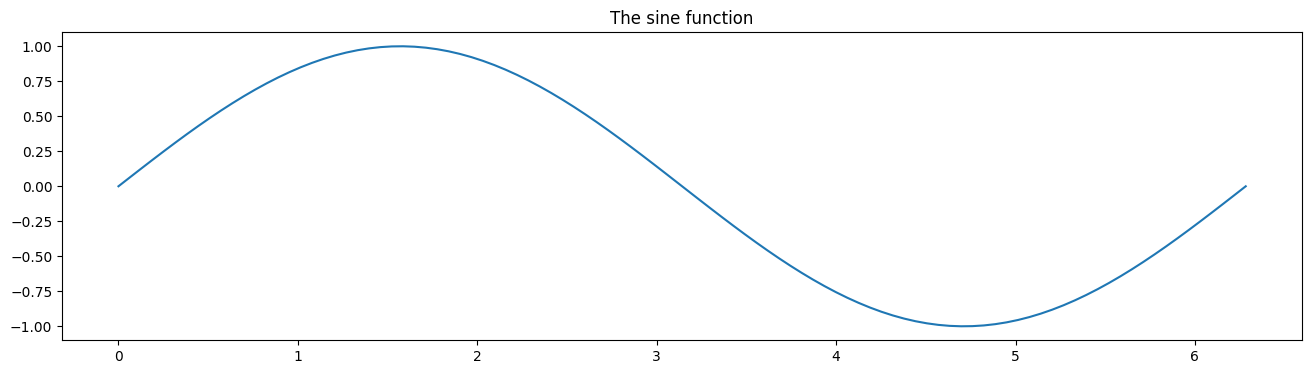

In [94]:
plt.figure(figsize=(16, 4))
xs = np.linspace(0, 2*np.pi, 100)
ys = np.sin(xs)
plt.plot(xs, ys)
plt.title("The sine function")
plt.show()

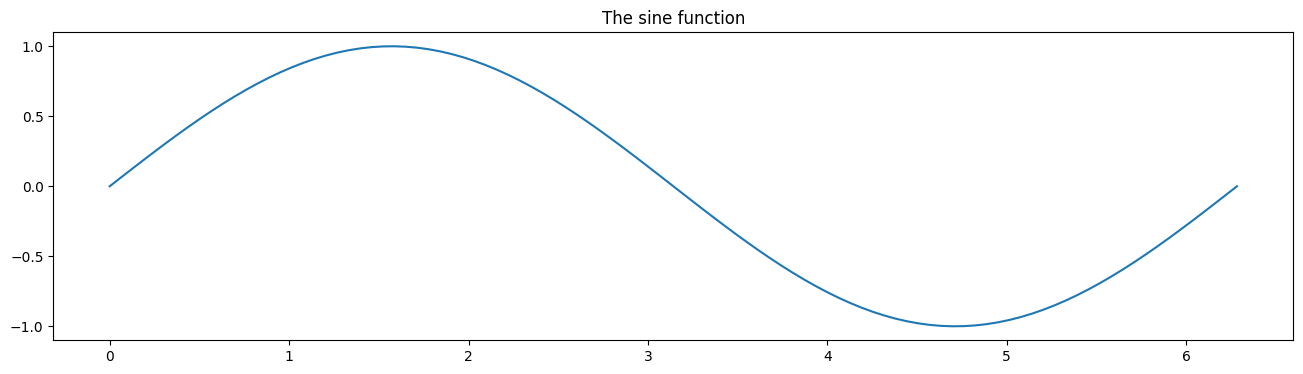

In [95]:
plt.figure(figsize=(16, 4))
xs = np.linspace(0, 2*np.pi, 100)
ys = np.sin(xs)
plt.plot(xs, ys)
plt.yticks([-1, -0.5, 0, 0.5, 1.0])
plt.title("The sine function")
plt.show()

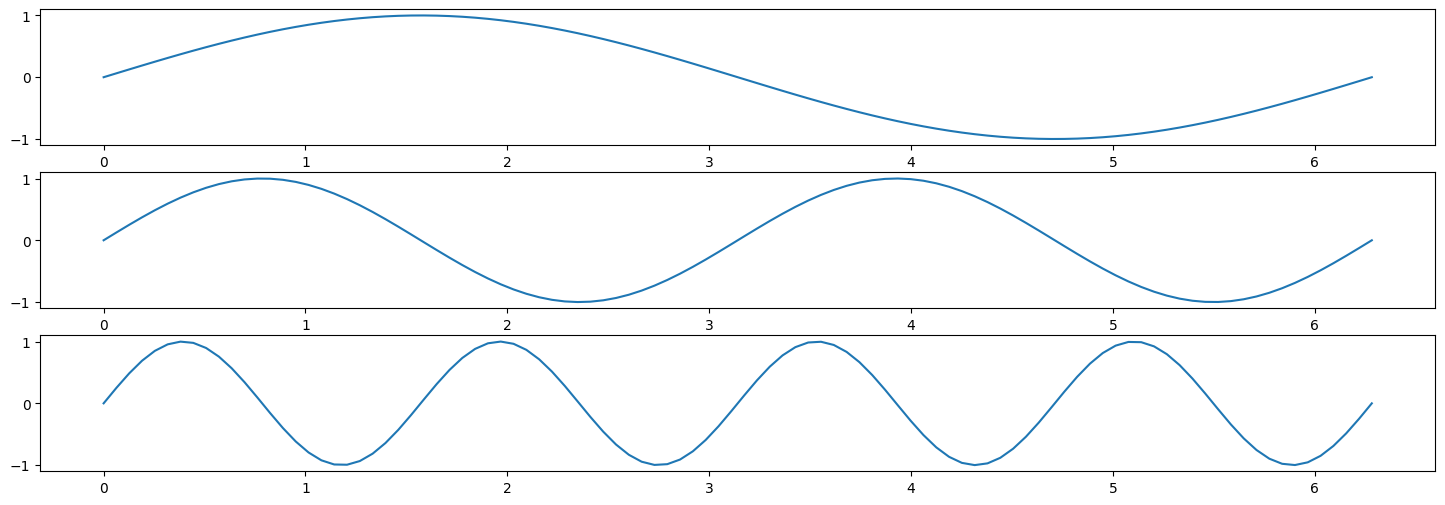

In [96]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(18, 6))
xs = np.linspace(0, 2*np.pi, 100)
ax[0].plot(xs, np.sin(xs))
ax[1].plot(xs, np.sin(2*xs))
ax[2].plot(xs, np.sin(4*xs))
plt.show()

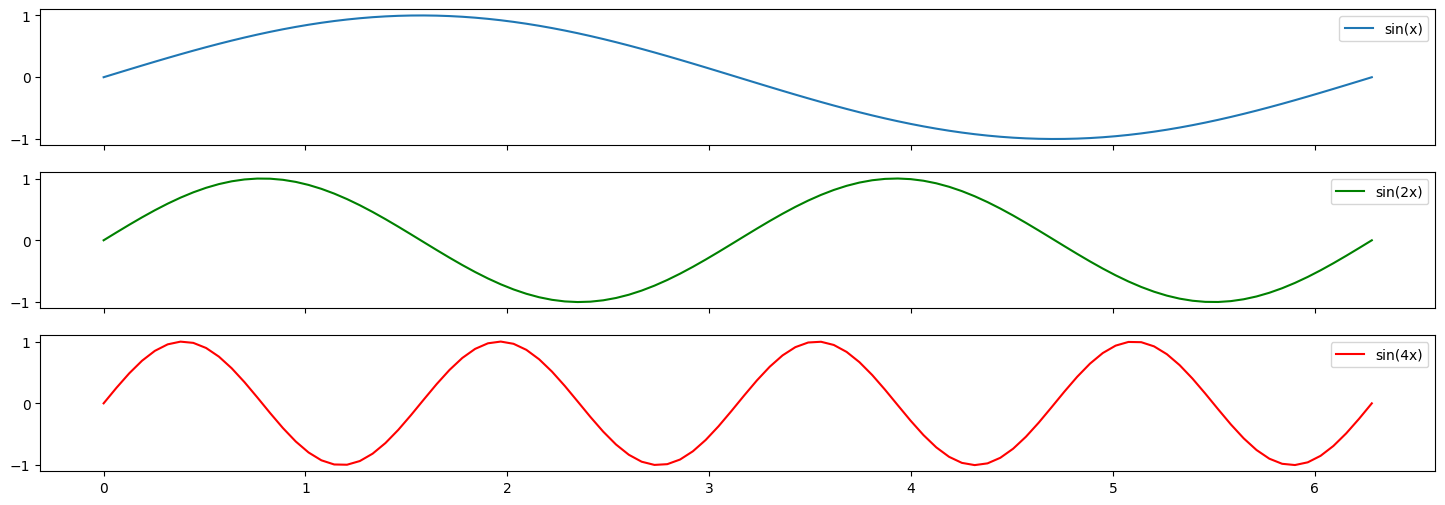

In [97]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(18, 6), sharex=True)
xs = np.linspace(0, 2*np.pi, 100)
ax[0].plot(xs, np.sin(xs), label="sin(x)")
ax[0].legend(loc="upper right")
ax[1].plot(xs, np.sin(2*xs), c="g", label="sin(2x)")
ax[1].legend(loc="upper right")
ax[2].plot(xs, np.sin(4*xs), c="r", label="sin(4x)")
ax[2].legend(loc="upper right")
plt.show()